In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#to avoid oversampling
from imblearn.over_sampling import SMOTE

# models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# for getting the results
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [57]:
import sklearn as sk
import imblearn as im
import matplotlib as plt
print("NumPy version:", np.__version__)
print("Pandas version:", im.__version__)
print("Scikit-learn version:", plt.__version__)

NumPy version: 1.26.4
Pandas version: 0.12.3
Scikit-learn version: 3.8.4


# Loading Dataset

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#deleting unneccesary columns

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


# Statistical Analysis and Data Exploration

In [6]:
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# checking null values in every column

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

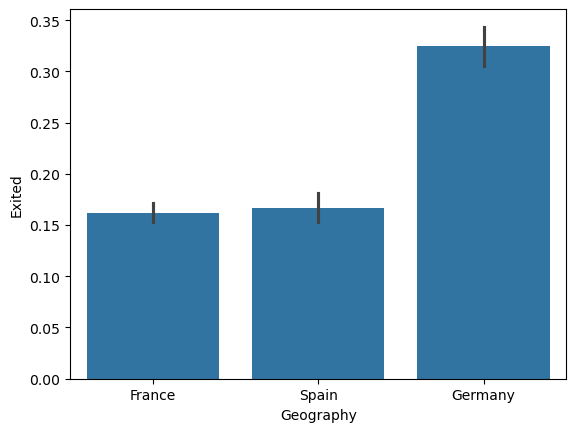

<Figure size 800x500 with 0 Axes>

In [11]:
sns.barplot(data = data, x = data.Geography, y = data.Exited)
plt.figure(figsize=(8, 5))
plt.show

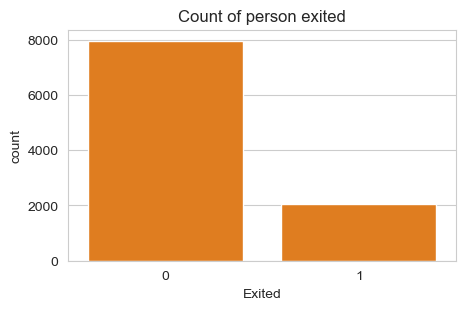

In [12]:
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(5, 3))
sns.countplot(x='Exited', data=data, color = colors[1])
plt.title('Count of person exited')

plt.show()

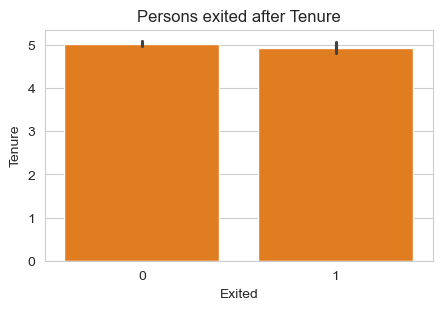

In [13]:
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(5, 3))
sns.barplot(x='Exited', y = 'Tenure' , data=data, color = colors[1])
plt.title('Persons exited after Tenure')
plt.show()

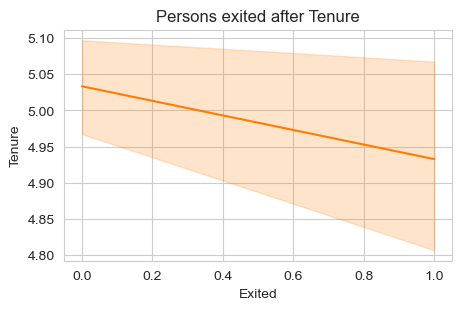

In [14]:
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(5, 3))
sns.lineplot(x='Exited', y = 'Tenure' , data=data, color = colors[1])
plt.title('Persons exited after Tenure')
plt.show()

## Dealing with Outliers

<Axes: ylabel='CreditScore'>

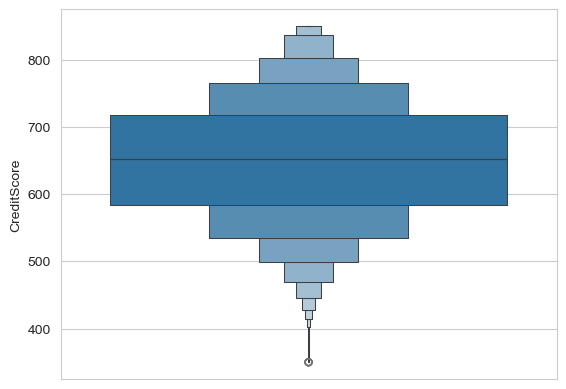

In [15]:
sns.boxenplot(data.CreditScore)

<Axes: ylabel='Age'>

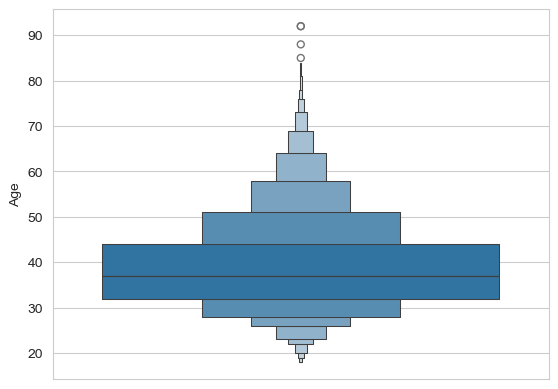

In [16]:
sns.boxenplot(data.Age)

In [17]:

data.drop(data[data['Age'] > 80].index, axis = 0, inplace= True)

<Axes: ylabel='Age'>

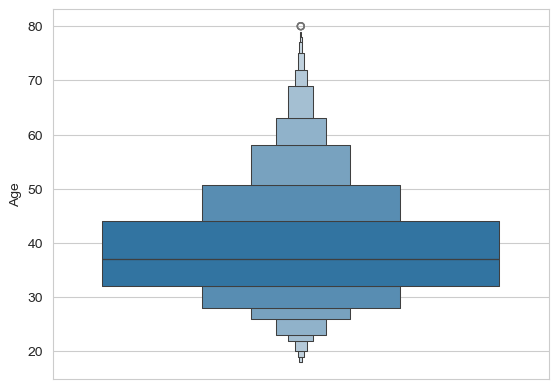

In [18]:
sns.boxenplot(data.Age)

In [19]:
data[data['Age'] > 80].shape[0]

0

<Axes: ylabel='Tenure'>

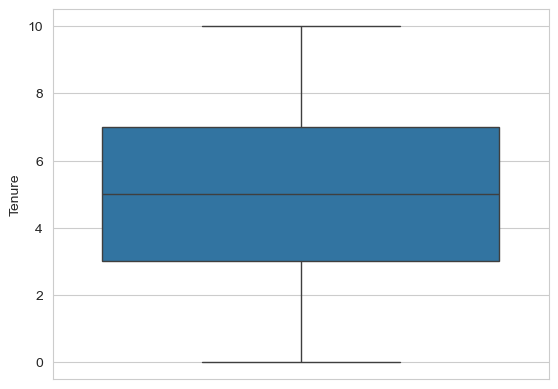

In [20]:
sns.boxplot(data['Tenure'])

<Axes: ylabel='Balance'>

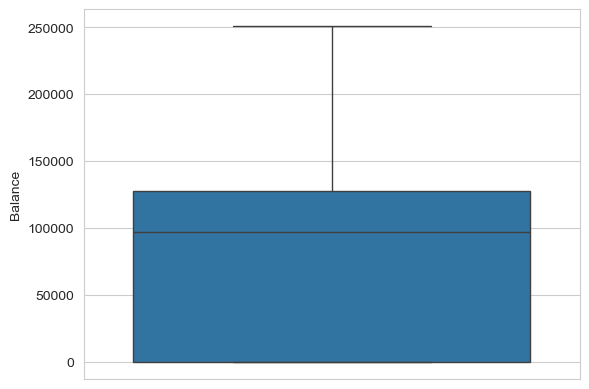

In [21]:
sns.boxplot(data['Balance'])

<Axes: ylabel='EstimatedSalary'>

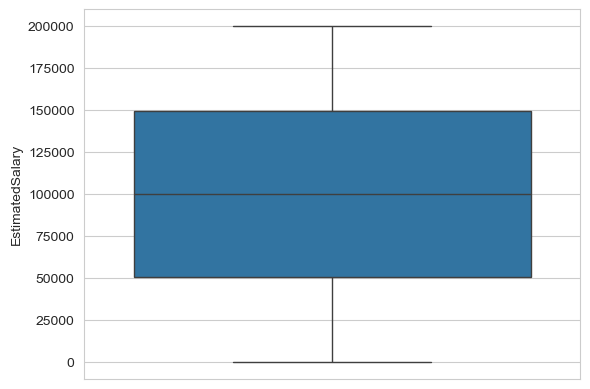

In [22]:
sns.boxplot(data['EstimatedSalary'])

# Label Encoding

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


## One-hot Encoding

In [25]:
encoded_data = pd.get_dummies(data, columns = ['Geography'], prefix = ['Geo']).astype(int)

## Seperating features and target and training the data

In [29]:
features = encoded_data.drop(['Exited'], axis = 1)
target = encoded_data.Exited

In [30]:
# dealing with oversampling as our target class is imbalanced
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target) 

In [29]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 42, stratify=y_resampled)

In [30]:
# Standardize the features
scaler = StandardScaler()
x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)

In [31]:
y_resampled.value_counts()

Exited
1    7952
0    7952
Name: count, dtype: int64

In [51]:
print(len(x_train + y_train))

12723


In [52]:
print(len(x_test + y_test))

3181


# Model Evaluation Function

In [46]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test_set, predictions), annot=True, fmt='g',cmap='viridis') #xticklabels =  [class_1, class_2], yticklabels =  [class_1, class_2, class_3, class_4])
    plt.tight_layout()
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro')]#,f1_score(y_test_set, predictions, average='macro')]
    return results

# Logistic Regresion

========== Logistic Regression ==========

Accuracy on validation set: 0.8233

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1591
           1       0.85      0.79      0.82      1590

    accuracy                           0.82      3181
   macro avg       0.82      0.82      0.82      3181
weighted avg       0.82      0.82      0.82      3181


Confusion Matrix : 



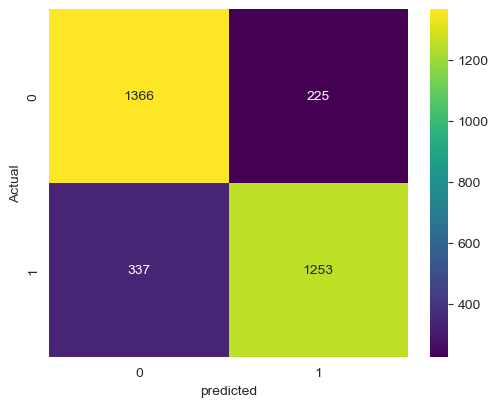

In [47]:
lg_model = LogisticRegression()
lg_model.fit(x_scale_train, y_train)
y_pred = lg_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Logistic Regression')

# Decsion Tree

========== Decision Tree ==========

Accuracy on validation set: 0.8240

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1591
           1       0.81      0.84      0.83      1590

    accuracy                           0.82      3181
   macro avg       0.82      0.82      0.82      3181
weighted avg       0.82      0.82      0.82      3181


Confusion Matrix : 



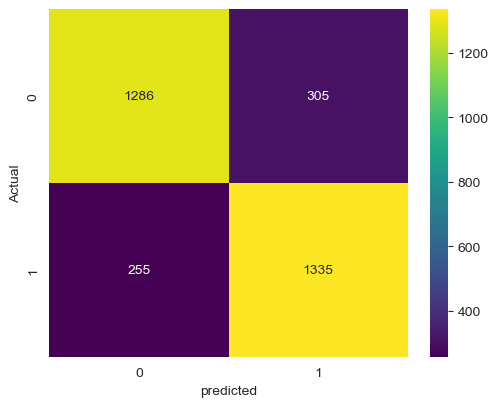

In [48]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_scale_train, y_train)
y_pred = dt_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Decision Tree')

# Randon Forest

========== Random Forest ==========

Accuracy on validation set: 0.8862

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1591
           1       0.90      0.87      0.88      1590

    accuracy                           0.89      3181
   macro avg       0.89      0.89      0.89      3181
weighted avg       0.89      0.89      0.89      3181


Confusion Matrix : 



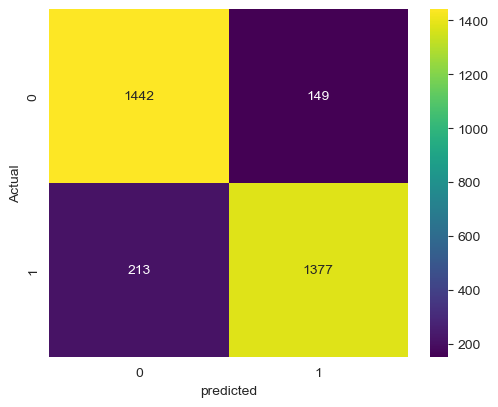

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(x_scale_train, y_train)
y_pred = rf_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Random Forest')

# Naive Bayes

========== Naive Bayes ==========

Accuracy on validation set: 0.8004

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1591
           1       0.81      0.78      0.80      1590

    accuracy                           0.80      3181
   macro avg       0.80      0.80      0.80      3181
weighted avg       0.80      0.80      0.80      3181


Confusion Matrix : 



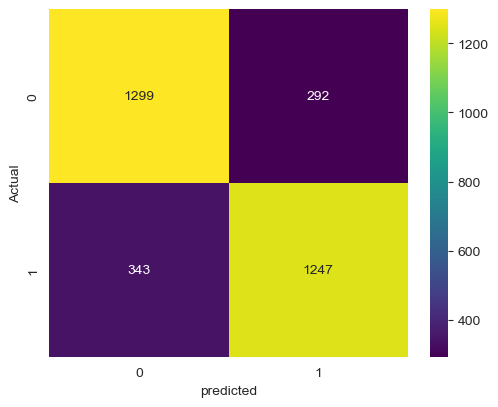

In [50]:
nb_model = GaussianNB()
nb_model.fit(x_scale_train, y_train)
y_pred = nb_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Naive Bayes')